# Beta
- Beta is a measure of a stock's volatility in relation to the overall market.
- S&P 500 Index has a beta of 1.0
- High-beta stocks are supposed to be riskier but provide higher return potential.
- Low-beta stocks pose less risk but also lower returns.

### Formula
- $Beta = \frac{Covariance}{Variance}$

### Interpretation
- Beta above 1: stock is more volatile than the market, but expects higher return
- Beta below 1: stock with lower volatility, and expects less return

### Resources
- Beta https://www.investopedia.com/investing/beta-know-risk/

In [1]:
import numpy as np
import pandas_datareader as pdr
import datetime as dt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:
tickers = ['AAPL', 'MSFT', 'TWTR', 'IBM', '^GSPC']
start = dt.datetime(2015, 12, 1)
end = dt.datetime(2021, 1, 1)

data = pdr.get_data_yahoo(tickers, start, end, interval="m")

In [4]:
data = data['Adj Close']

In [5]:
log_returns = np.log(data/data.shift())

In [6]:
log_returns

Symbols,AAPL,MSFT,TWTR,IBM,^GSPC
Date,,,,,
2015-12-01,NaN,NaN,NaN,NaN,NaN
2016-01-01,-0.078223,-0.007054,-0.320184,-0.097864,-0.052068
2016-02-01,-0.006700,-0.079498,0.075638,0.048794,-0.004137
2016-03-01,0.125158,0.089191,-0.090630,0.154992,0.063905
2016-04-01,-0.150731,-0.102087,-0.123996,-0.037060,0.002696
...,...,...,...,...,...
2020-09-01,-0.106370,-0.067361,0.092214,-0.000381,-0.040018
2020-10-01,-0.061888,-0.038086,-0.073175,-0.085854,-0.028056
2020-11-01,0.089481,0.055711,0.117353,0.100944,0.102146


In [8]:
cov = log_returns.cov()

In [9]:
var = log_returns['^GSPC'].var()

In [10]:
var

0.0019235693497498328

In [12]:
cov.loc['AAPL', '^GSPC']/var

1.2545572554089455

In [13]:
cov.loc['^GSPC']/var

Symbols
AAPL     1.254557
MSFT     0.797269
TWTR     0.933242
IBM      1.249102
^GSPC    1.000000
Name: ^GSPC, dtype: float64

In [14]:
X = log_returns['^GSPC'].iloc[1:].to_numpy().reshape(-1, 1)
Y = log_returns['AAPL'].iloc[1:].to_numpy().reshape(-1, 1)

lin_regr = LinearRegression()
lin_regr.fit(X, Y)

lin_regr.coef_[0, 0]

1.2545572554089448

In [15]:
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


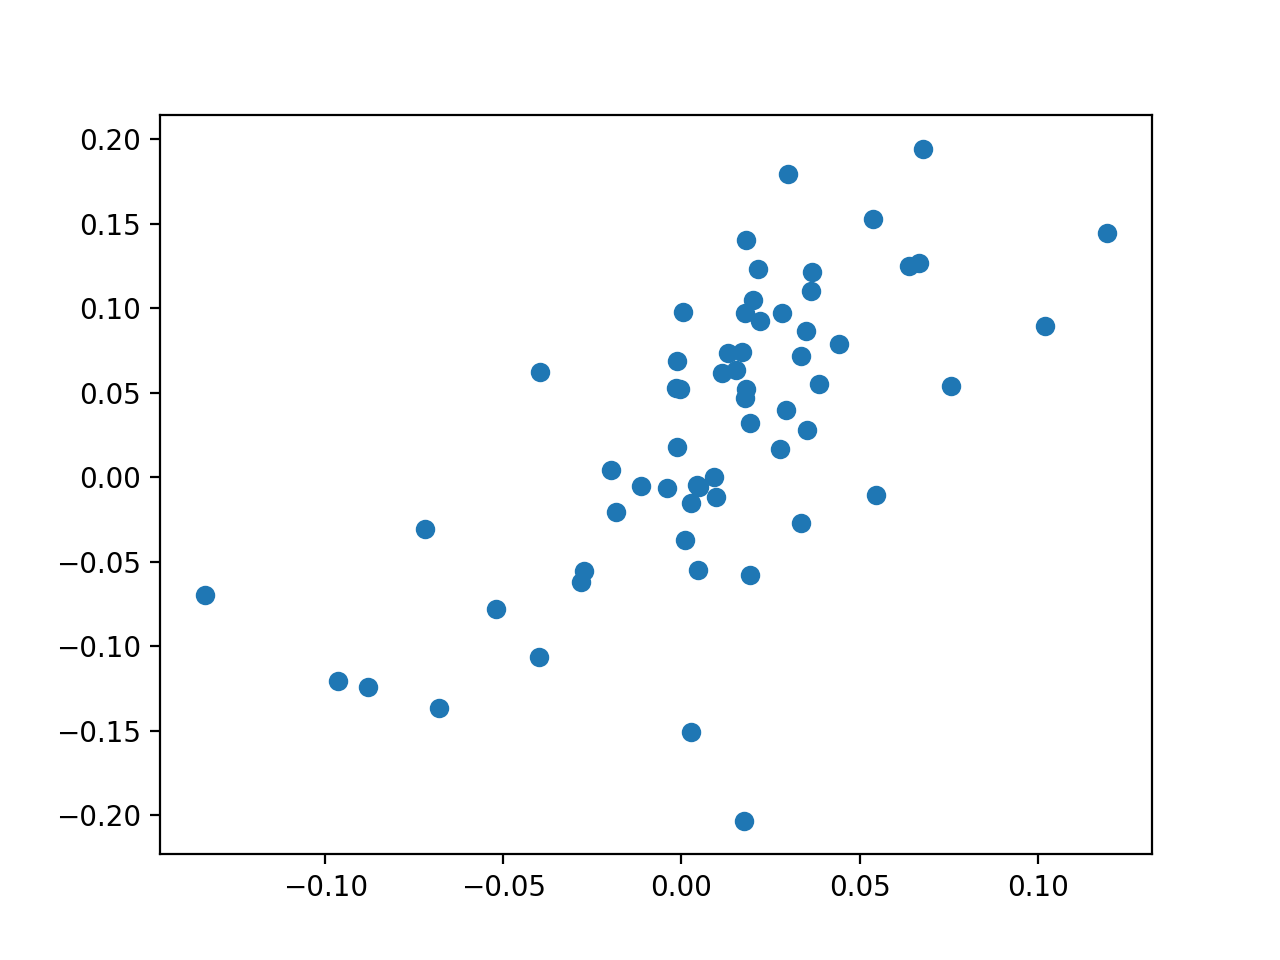

In [16]:
fig, ax = plt.subplots()
ax.scatter(X, Y)
